## **Gaussian Processes in 2D: Demographic Changes in Philadelphia Over Time**

*Mar 5, 2024*

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# -- set plotting defaults
plt.style.use("bmh")
px.defaults.template = "ggplot2"

In [ ]:
# -- load the 2000 decennial and 2016 acs data
fname00 = "/content/drive/Shareddrives/mlpp24/data/census/2000/DECENNIALSF12000.P003_data_with_overlays_2021-03-15T235324.csv"
fname16 = "/content/drive/Shareddrives/mlpp24/data/census/2016/ACSDT5Y2016.B02001_data_with_overlays_2021-03-15T184552.csv"

dec00 = pd.read_csv(fname00, skiprows=1)
acs16 = pd.read_csv(fname16, skiprows=1)

In [ ]:
# -- extract only those columns that are needed from ACS
cols00 = ["id", "Total", "Total!!Population of one race!!White alone"]
cols16 = ["id", "Estimate!!Total", "Estimate!!Total!!White alone"]

dec00 = dec00[cols00]
acs16 = acs16[cols16]

In [ ]:
# -- rename columns for ease of use
dec00.columns = ["id", "total00", "white00"]
acs16.columns = ["id", "total16", "white16"]

In [ ]:
# -- drop census tracts with no people
dec00 = dec00[dec00["total00"] > 0]
acs16 = acs16[acs16["total16"] > 0]

In [ ]:
# -- calculate fraction of residents who are white
dec00["wfrac00"] = dec00['white00'] / dec00['total00']
acs16["wfrac16"] = acs16['white16'] / acs16['total16']

In [ ]:
# -- load the 2016 census tract shapes
ctname16 = "/content/drive/Shareddrives/mlpp24/data/census/ctshapes/2016/cb_2016_42_tract_500k.shp"
ct16 = gp.read_file(ctname16)

In [ ]:
ct16

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970..."
1,42,101,011900,1400000US42101011900,42101011900,119,CT,690903,0,"POLYGON ((-75.23367 39.99188, -75.22566 39.991..."
2,42,101,013900,1400000US42101013900,42101013900,139,CT,562937,0,"POLYGON ((-75.17785 39.97425, -75.17378 39.974..."
3,42,101,015700,1400000US42101015700,42101015700,157,CT,485072,0,"POLYGON ((-75.13877 39.97932, -75.13814 39.982..."
4,42,101,016300,1400000US42101016300,42101016300,163,CT,572226,0,"POLYGON ((-75.13902 39.98876, -75.13835 39.991..."
...,...,...,...,...,...,...,...,...,...,...
3212,42,129,805000,1400000US42129805000,42129805000,8050,CT,40577425,57686,"POLYGON ((-79.75986 40.25241, -79.75621 40.253..."
3213,42,121,201400,1400000US42121201400,42121201400,2014,CT,273393108,2598355,"POLYGON ((-79.99978 41.31372, -79.99978 41.369..."
3214,42,125,743700,1400000US42125743700,42125743700,7437,CT,1064187,0,"POLYGON ((-80.22130 40.25623, -80.22016 40.254..."
3215,42,125,751200,1400000US42125751200,42125751200,7512,CT,13500577,0,"POLYGON ((-80.33256 40.20118, -80.33061 40.199..."


In [ ]:
# -- merge with census shapes
ctacs16 = ct16.merge(acs16, left_on ='AFFGEOID', right_on = 'id')
ctacs16

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,id,total16,white16,wfrac16
0,42,101,010200,1400000US42101010200,42101010200,102,CT,360618,0,"POLYGON ((-75.23536 39.96851, -75.23570 39.970...",1400000US42101010200,3008,0,0.000000
1,42,101,011900,1400000US42101011900,42101011900,119,CT,690903,0,"POLYGON ((-75.23367 39.99188, -75.22566 39.991...",1400000US42101011900,4738,47,0.009920
2,42,101,013900,1400000US42101013900,42101013900,139,CT,562937,0,"POLYGON ((-75.17785 39.97425, -75.17378 39.974...",1400000US42101013900,2960,466,0.157432
3,42,101,015700,1400000US42101015700,42101015700,157,CT,485072,0,"POLYGON ((-75.13877 39.97932, -75.13814 39.982...",1400000US42101015700,2688,1485,0.552455
4,42,101,016300,1400000US42101016300,42101016300,163,CT,572226,0,"POLYGON ((-75.13902 39.98876, -75.13835 39.991...",1400000US42101016300,3710,1605,0.432615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,42,101,033000,1400000US42101033000,42101033000,330,CT,732828,0,"POLYGON ((-75.04059 40.03686, -75.03929 40.037...",1400000US42101033000,7231,5616,0.776656
373,42,101,034400,1400000US42101034400,42101034400,344,CT,3399171,13905,"POLYGON ((-75.06946 40.09441, -75.05834 40.105...",1400000US42101034400,7967,6126,0.768922
374,42,101,036000,1400000US42101036000,42101036000,360,CT,2043083,638,"POLYGON ((-75.02393 40.10070, -75.00539 40.114...",1400000US42101036000,3128,1853,0.592391
375,42,101,036900,1400000US42101036900,42101036900,369,CT,1855494,193283,"POLYGON ((-75.20784 39.94129, -75.20506 39.943...",1400000US42101036900,5355,3345,0.624650


In [ ]:
# -- make an interactive choropleth for 2016
labs = {"wfrac16":"fraction of residents<br>that are white 2016"}
fig = px.choropleth_mapbox(ctacs16, geojson=ctacs16.set_index('AFFGEOID'), locations='AFFGEOID',
                           opacity=0.75,
                           color='wfrac16',color_continuous_scale="viridis",
                           title="Philadelphia, PA",
                           mapbox_style="carto-positron",
                           center={"lon":-75.15, "lat":40.00},
                           zoom=9.5, height=600, width=900, labels=labs)

fig.show()

In [ ]:
# -- now lets merge 2000
ctdec00 = ct16.merge(dec00, left_on ='AFFGEOID', right_on = 'id')

In [ ]:
# -- make an interactive choropleth for 2000
labs = {"wfrac00":"fraction of residents<br>that are white 2000"}
fig = px.choropleth_mapbox(ctdec00, geojson=ctdec00.set_index('AFFGEOID'), locations='AFFGEOID',
                           opacity=0.75,
                           color='wfrac00',color_continuous_scale="viridis",
                           title="Philadelphia, PA",
                           mapbox_style="carto-positron",
                           center={"lon":-75.15, "lat":40.00},
                           zoom=9.5, height=600, width=900, labels=labs)

fig.show()

In [ ]:
# -- read the 2000 census tract shapes
ctname00 = "/content/drive/Shareddrives/mlpp24/data/census/ctshapes/2000/tr42_d00.shp"
ct00 = gp.read_file(ctname00)

In [ ]:
# -- consider the geo identifier encoding in the 2000 census tracts GeoDataFrame
ct00

,AREA,PERIMETER,TR42_D00_,TR42_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
0,0.004057,0.398728,2,1,42,049,011701,0117.01,TR,None,"POLYGON ((-79.76214 42.24141, -79.77252 42.235..."
1,0.017494,0.558170,3,2,42,049,011702,0117.02,TR,None,"POLYGON ((-79.78063 42.23206, -79.77991 42.232..."
2,0.000370,0.090991,4,3,42,049,0116,0116,TR,None,"POLYGON ((-79.82202 42.21576, -79.82202 42.215..."
3,0.002350,0.228274,5,4,42,049,011505,0115.05,TR,None,"POLYGON ((-79.90727 42.20936, -79.90287 42.210..."
4,0.005081,0.348200,6,5,42,049,011507,0115.07,TR,None,"POLYGON ((-79.90047 42.18656, -79.90047 42.185..."
...,...,...,...,...,...,...,...,...,...,...,...
3142,0.000252,0.084906,3144,3143,42,055,0122,0122,TR,None,"POLYGON ((-77.57996 39.75687, -77.58633 39.750..."
3143,0.002813,0.304160,3145,3144,42,029,3068,3068,TR,None,"POLYGON ((-75.86815 39.74030, -75.86528 39.736..."
3144,0.001695,0.242311,3146,3145,42,055,012502,0125.02,TR,None,"POLYGON ((-77.46029 39.74365, -77.46004 39.736..."
3145,0.000383,0.115553,3147,3146,42,055,0124,0124,TR,None,"POLYGON ((-77.57768 39.75554, -77.57199 39.752..."


In [ ]:
# -- construct a "proper" geoid that can be mereged with the ACS data
state = ct00["STATE"]
county = ct00["COUNTY"]
tract = ct00["TRACT"]
tract = tract + "00"
tract = tract.str[:6]

affgeoid = "1400000US" + state + county + tract
ct00["AFFGEOID"] = affgeoid

In [ ]:
# -- now merge with acs 2000
ctdec00 = ct00.merge(dec00, left_on ='AFFGEOID', right_on = 'id')

In [ ]:
# -- make an interactive choropleth for 2000
labs = {"wfrac00":"fraction of residents<br>that are white 2000"}
fig = px.choropleth_mapbox(ctdec00, geojson=ctdec00.set_index('AFFGEOID'), locations='AFFGEOID',
                           opacity=0.75,
                           color='wfrac00',color_continuous_scale="viridis",
                           title="Philadelphia, PA",
                           mapbox_style="carto-positron",
                           center={"lon":-75.15, "lat":40.00},
                           zoom=9.5, height=600, width=900, labels=labs)

fig.show()

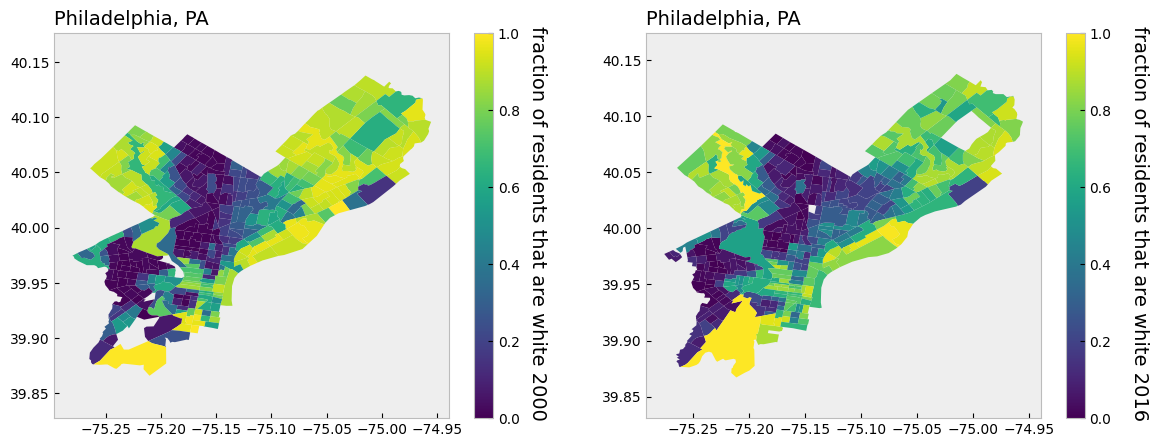

In [ ]:
# -- plot the two side-by-side
fig, axs = plt.subplots(1, 2, figsize=[14, 5])

ctdec00.plot("wfrac00", legend=True, vmin=0, vmax=1, ax=axs[0])
axs[0].axis("equal")
axs[0].grid(False)
axs[0].set_title("Philadelphia, PA", loc="left", fontsize=14)
fig.text(0.47, 0.5, "fraction of residents that are white 2000", ha="center",
         va="center", rotation=-90, fontsize=14)

ctacs16.plot("wfrac16", legend=True, vmin=0, vmax=1, ax=axs[1])
axs[1].axis("equal")
axs[1].grid(False)
axs[1].set_title("Philadelphia, PA", loc="left", fontsize=14)
fig.text(0.9, 0.5, "fraction of residents that are white 2016", ha="center",
         va="center", rotation=-90, fontsize=14)

fig.show()

<ipython-input-21-394a5d5e2294>:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-21-394a5d5e2294>:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




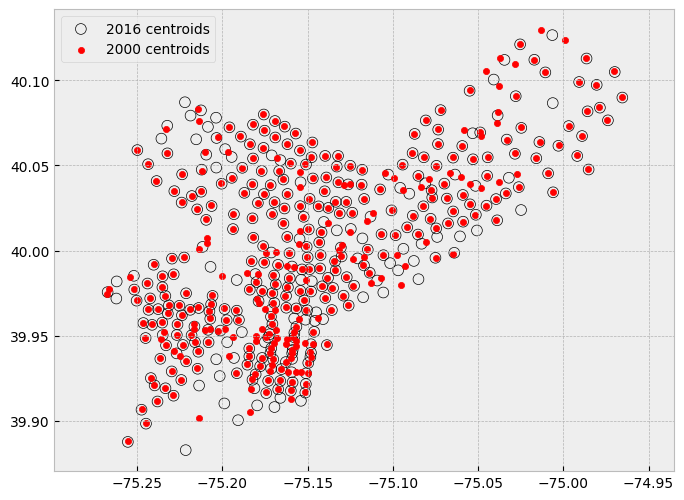

In [ ]:
# -- let's look at just how far off the centroids of the zips actually are
lon00 = ctdec00.centroid.x
lat00 = ctdec00.centroid.y

lon16 = ctacs16.centroid.x
lat16 = ctacs16.centroid.y

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(lon00, lat00, facecolor="none", color="k", s=60, label="2016 centroids")
ax.scatter(lon16, lat16, c="r", s=20, label="2000 centroids")
ax.legend()
ax.axis("equal")
fig.show()

We'd like to subtract the 2000 values from the 2016 values to make a choropleth of the difference

**To do this, what we'd like are the 2000 values *at the location of the 2016 values*.  The steps are:**

1. create the features array where the features are the locations of the 2000 data.

2. fit a Gaussian Process model to the 2000 (so that we can interpolate it)

3. interpolate the 2000 values at the 2016 locations

4. subtract the interpolated 2000 values from the 2016 values since they are now spatially aligned

In [ ]:
# -- let's use Gaussian Process Regression to interpolate the 2000 data to the
#    2016 locations.

# -- first some imports
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [ ]:
# -- we need the usual 2D array of Nobj x Nfeat
feat = pd.DataFrame()
feat['lon'] = lon00
feat['lat'] = lat00

# -- and an Nobj "target"
targ = ctdec00['wfrac00']

In [ ]:
# -- now we need to standardize before fitting
feat_st = (feat - feat.mean()) / feat.std()
targ_st = (targ - targ.mean()) / targ.std()

In [ ]:
# -- now we initialize the kernel and fit to the data
kernel = C(1.0, (1e-3, 1e3)) * RBF(10., (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gpr.fit(feat_st, targ_st)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

In [ ]:
# -- now we can use this fit model to predict the 2000 census data at the 2016
#    census tract centroids

# -- create the features array for prediction
feat_pred = pd.DataFrame()
feat_pred['lon'] = lon16
feat_pred['lat'] = lat16

# -- standardize
feat_pred_st = (feat_pred - feat.mean()) / feat.std()

# -- predict
wf16pred_st = gpr.predict(feat_pred_st)

In [ ]:
# -- now un-standardize and reattatch to the GeoDF
ctacs16["wfrac00_pred"] = (wf16pred_st * targ.std() + targ.mean())

# -- take the difference between 2016 and "predicted" 2000
ctacs16["wfrac_diff_pred"] = ctacs16['wfrac16'] - ctacs16["wfrac00_pred"]

In [ ]:
# -- make a choropleth
labs = {"wfrac_diff_pred":"difference in fraction of residents<br>that are white (2016 minus 2000)"}
fig = px.choropleth_mapbox(ctacs16,
                           geojson=ctacs16.set_index("AFFGEOID"),
                           locations="AFFGEOID",
                           color="wfrac_diff_pred", opacity=0.75,
                           color_continuous_scale="RdBu_r", range_color=[-0.2, 0.2],
                           title="Philadelphia, PA",
                           mapbox_style="carto-positron",
                           center={"lon":-75.15, "lat":40.00},
                           zoom=9.5, height=600, width=900, labels=labs)

fig.show()